In [1]:

from sklearn.datasets import make_regression
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
from ipykernel import kernelapp as app

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
df0 = pd.read_csv('C:/Users/a/GitHub/fc_team_project2/datasets/lcdf4.csv')
df0

,Unnamed: 0,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,0,0.384615,60 months,0.172575,0.198015,B3,OWN,0.012019,n,0.358136,1,0.0,20.0,NaN,25,0,0.016053,0.177326,38,0.338755,0.338755,0.086681,0.086681,0.070992,0.124729,2.415073e-11,0.0,0.0,0.008019,1,53.0,1,INDIVIDUAL,0,0.001562,0.020022,0.111111,0.062500,0.08,0.039216,2.0,0.016662,68.0,0.035714,0.116667,0.005463,0.225490,0.033702,0.104167,0.009009,0.224490,11,0.006032,12857.0,48.6,0,0,0.236802,0.282536,12,2,1,14.0,NaN,2.0,20.0,1,5,13,6,10,8,19,28,13,25,0.0,0,0,5,0.946,16.7,0,0,0.015805,0.027481,0.022614,0.019098
1,1,0.128205,36 months,0.080639,0.100477,A4,MORTGAGE,0.007002,n,0.284948,0,0.0,NaN,NaN,12,0,0.005196,0.137209,18,0.000000,0.000000,0.126151,0.126151,0.150000,0.029982,2.415073e-11,0.0,0.0,0.107025,0,NaN,1,INDIVIDUAL,0,0.000701,0.004521,0.000000,0.104167,0.04,0.019608,7.0,0.012404,87.0,0.000000,0.050000,0.004051,0.269608,0.014119,0.000000,0.027027,0.040816,4,0.002725,4158.0,55.8,0,0,0.134238,0.091212,14,7,0,14.0,NaN,9.0,NaN,0,2,4,2,4,8,7,10,4,12,0.0,0,0,1,1.000,0.0,0,0,0.004265,0.015902,0.008503,0.011069
2,2,0.118590,36 months,0.503701,0.111881,D3,MORTGAGE,0.005051,n,0.280800,0,0.0,67.0,NaN,7,0,0.001698,0.156395,14,0.101301,0.101301,0.052593,0.052593,0.042238,0.078392,2.415073e-11,0.0,0.0,0.004842,0,NaN,1,INDIVIDUAL,0,0.009478,0.028708,0.166667,0.020833,0.04,0.058824,3.0,0.004886,98.0,0.107143,0.083333,0.000465,0.318627,0.004052,0.000000,0.009009,0.000000,8,0.029656,1809.0,30.4,0,0,0.182504,0.144605,2,2,1,2.0,81.0,14.0,81.0,0,3,4,3,4,7,5,6,4,7,0.0,0,0,4,0.846,0.0,0,0,0.019800,0.006029,0.002352,0.003852
3,3,0.128205,36 months,0.211531,0.106517,B4,RENT,0.003135,n,0.526470,0,0.0,NaN,NaN,7,0,0.003535,0.437791,8,0.104294,0.104294,0.050254,0.050254,0.048707,0.047806,2.415073e-11,0.0,0.0,0.004644,0,NaN,1,INDIVIDUAL,0,0.000000,0.004934,0.055556,0.020833,0.00,0.019608,16.0,0.014978,81.0,0.107143,0.083333,0.001122,0.392157,0.003008,0.020833,0.000000,0.000000,6,0.005097,334.0,84.1,0,0,0.024133,0.142380,3,3,0,10.0,NaN,16.0,NaN,0,3,6,3,3,1,6,7,6,7,0.0,0,0,3,1.000,100.0,0,0,0.003113,0.017355,0.001900,0.014363
4,4,0.230769,36 months,0.119595,0.183338,B1,RENT,0.004494,n,0.746036,0,0.0,NaN,25.0,13,1,0.006789,0.302907,17,0.171805,0.171805,0.080964,0.080964,0.083138,0.061872,2.415073e-11,0.0,0.0,0.007478,0,NaN,1,INDIVIDUAL,0,0.003275,0.007174,0.000000,0.062500,0.00,0.019608,23.0,0.020663,66.0,0.035714,0.033333,0.003845,0.308824,0.008349,0.041667,0.036036,0.000000,3,0.004323,2327.0,59.9,0,0,0.072398,0.043382,7,7,0,31.0,NaN,18.0,NaN,0,2,7,2,2,4,10,13,7,13,0.0,0,0,1,1.000,0.0,0,0,0.005932,0.025231,0.005246,0.024103
5,5,0.410256,36 months,0.172575,0.332156,B3,MORTGAGE,0.003658,n,0.617224,0,0.0,NaN,NaN,4,0,0.013416,0.499419,8,0.190371,0.190371,0.214918,0.214918,0.240107

In [4]:
pd.options.display.max_rows=120
pd.options.display.max_columns=120

In [6]:
#grade to integer 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df0["sub_grade"].value_counts().index.sort_values())
le.classes_
df0["sub_grade_t"]=le.transform(df0["sub_grade"])

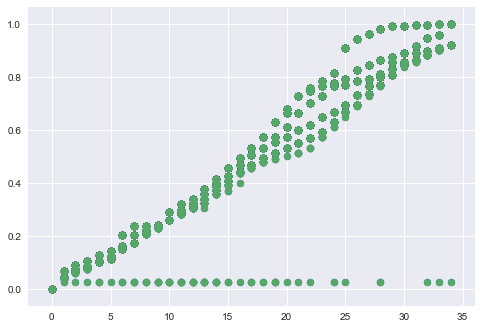

In [8]:
plt.figure
plt.scatter(df0.sub_grade_t,df0.int_rate)
plt.show()